# Elementos del parcial
    

In [2]:
#Ordenar dos listas

x=[1,3,2.1,4.5,6.7,8.9,5,3.5,1.9]
y=[34,45,67,18,37,24,90,36,29]

xord=[]
yord=[]

for i in range(0,len(x)):
    a=min(x)
    xord.append(a)
        
    for j in range(0,len(x)):
        if x[j]==a:
            yord.append(y[j])
            y.remove(y[j])
        
    x.remove(a)
    
print(xord)
print(yord)
print(x,y)

[1, 1.9, 2.1, 3, 3.5, 4.5, 5, 6.7, 8.9]
[34, 29, 67, 45, 36, 18, 90, 37, 24]
[] []


In [3]:
#Método de Bisección

import numpy as np
 
def func(x):
    val=np.sin(x)-np.cos(x)+np.tan(x)
    return val

def sign(x):
    if x<0:
        return -1
    if x>0:
        return 1
    if x==0:
        return 0
    
print(func(-1))
print(func(4))

-2.939181015330939
1.0546624079052611


In [4]:
Tol=1e-10
iter=0
error=1.0
x1=-1.0
x2=4.0
Nmax=2000


while error>Tol:
    mid=x1+abs((x1-x2)/2.0)
    error=abs(func(mid))
    if sign(func(mid))==sign(func(x1)):
        x1=mid
        x2=x2
    
    if sign(func(mid))==sign(func(x2)):
        x2=mid
        x1=x1
    if sign(func(mid))==0:
        print("Raíz: %f"%mid)
        break
    iter=iter+1    
    if iter>Nmax:
        print("No se halló raíz")
        
print("Raíz=%.13f  F(R)=%.14f"%(mid,func(mid)))

Raíz=0.4431436458108  F(R)=0.00000000007751


In [5]:
#Método de Newton-Raphson

def func(x):
    val=np.sin(x)-np.cos(x)+np.tan(x)-x
    return val

def dydx(x):
    val=np.cos(x)+np.sin(x)+(1.0/np.cos(x)**2)-1.0
    return val


In [6]:
#comentarios!!!!!!

Tol=1e-10
error=1.0
iter=0
Po=0.0
Nmax=2000

if dydx(Po)==0:
    print("Método no concluyente")

else:
    while error>Tol:
    
        P=-(func(Po)/dydx(Po))+Po
        
        error=abs(func(P))
        
        print(P)
        
        Po=P
    
        iter=iter+1
    
        if iter>Nmax:
            print("No se pudo hallar raíz")
            break
            
print("Raíz=%f    F(R)=%f" %(P,func(P)))


1.0
0.7744915865521881
0.6950014844679736
0.6897192910839034
0.689699658075509
0.6896996578071741
Raíz=0.689700    F(R)=0.000000


In [7]:
#Método de la secante
def func(x):
    val=np.sin(x)-np.cos(x)+np.tan(x)-x
    return val

print(func(2))
print(func(1))

-2.859595599888695
0.858576403594659


In [8]:
#comentarios!!!!!!

Tol=1e-10
error=1.0
iter=0
Po=0.0
P1=2.0
Nmax=2000

while error>Tol:
    P=-(func(Po)*(P1-Po)/(func(P1)-func(Po)))+Po
    error=abs(func(P))
    
    
    Po=P1
    P1=P
    
    iter=iter+1
    if iter>Nmax:
        print("No se pudo hallar raíz")
        break
        
print("Raíz:%f     F(R):%f"%(P,func(P)))
    
    
    

Raíz:0.689700     F(R):0.000000


In [9]:
#Falsa posición

def func(x):
    val=np.sin(x)-np.cos(x)+np.tan(x)-x+np.log(x)
    return val

def sign(x):
    if x<0:
        return -1
    if x>0:
        return 1
    if x==0:
        return 0

In [11]:
Tol=1e-10
error=1.0
Po=0.5
P1=1.0
Nmax=2000
iter=0

if func(Po)*func(P1)>0:
    print("Método no concluyente")
else:
    while error>Tol:
        
        P=-((func(Po)*(Po-P1))/(func(Po)-func(P1)))+Po
        print(P)
        error=abs(func(P))
        
        if sign(func(P))==0:
            print("Raíz=%f   F(R)=%f" %(P,func(P)))
            break 
            
        if sign(func(P))==sign(func(P1)):
            P1=P
            Po=Po
        if sign(func(P))==sign(func(Po)):
            Po=P
            P1=P1
            
        iter=iter+1
        
        if iter>Nmax:
            print("No se pudo hallar raíz")
            

print("Raíz=%f   F(R)=%f" %(P,func(P)))

0.7744835382226134
0.7908243726019913
0.7924963922198326
0.7926719958697238
0.7926904874960047
0.7926924352643093
0.7926926404335172
0.7926926620451912
0.792692664321676
0.7926926645614716
0.7926926645867306
Raíz=0.792693   F(R)=-0.000000


# Métodos de interpolación

In [5]:
#Interpolación lineal

import matplotlib.pyplot as plt

x=[0,2,3,4,5,9,10]
y=[13,2,34,57,6,32,45]

def interplineal(x,y,u):
    
    for i in range(0,len(x)-1):
        if x[i]<=u<=x[i+1]:
            val=(u-x[i])*((y[i+1]-y[i])/(x[i+1]-x[i]))+y[i]
            return val
    
valx=np.linspace(min(x),max(x),20000)
valy=[]

for i in range(0,len(valx)):
    valy.append(interplineal(x,y,valx[i]))
    
plt.plot(x,y,'*')
plt.plot(valx,valy)
plt.show()



<Figure size 640x480 with 1 Axes>

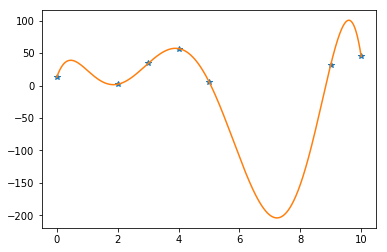

In [6]:
#Método de polinomios de Lagrange


x=[0,2,3,4,5,9,10]
y=[13,2,34,57,6,32,45]

def Lagrange(x,y,u):
    sum=0.0
    for i in range(0,len(x)):
        prod=1.0
        for j in range(0,len(x)):
            if j!=i:
                prod=prod*((u-x[j])/(x[i]-x[j]))
        sum=sum+prod*y[i]
    return sum
valx=np.linspace(min(x),max(x),20000)
valy=[]

for i in range(0,len(valx)):
    valy.append(Lagrange(x,y,valx[i]))
    
plt.plot(x,y,'*')
plt.plot(valx,valy)
plt.show()

In [13]:
#Interpolación vía Splines Cúbicos

import numpy as np
x_list = [1,2,5,6,7,8,10]
y_list = [3.0,3.7,3.9,4.2,5.7,6.6,5.7]

#print(len(y_list))
#print(len(x_list))

n = len(x_list)-1 #3/h[] n=3

x = np.zeros(n+1)

a = np.zeros(n+1)
b = np.zeros(n+1)
c = np.zeros(n+1)
d = np.zeros(n+1)

l  = np.zeros(n+1)
mu = np.zeros(n+1)
z  = np.zeros(n+1)

va = np.zeros(n+1)

h = np.zeros(n)


for i in range(0,len(x)):
    x[i] = x_list[i]
    a[i] = y_list[i]
#print(x)
#print(a)

#step 1

for i in range(0,n):
    h[i]=x[i+1]-x[i]
#print(h)

#step 2

for i in range(1,n):
    va[i] = 3/h[i] * (a[i+1]-a[i]) - 3/h[i-1] * (a[i]-a[i-1])
#print(va)


#step 3, solucion del sistema de ecuaciones lineales

l[0] = 1
mu[0] = 0
z[0] = 0

for i in range(1,n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i]/l[i]
    z[i] = (va[i]-h[i-1]*z[i-1])/l[i]
        
l[n] = 1
z[n] = 0
c[n] = 0

for j in np.arange(n-1,-1,-1):
    c[j] = z[j]-mu[j]*c[j+1]
    b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
    d[j] = (c[j+1]-c[j])/(3*h[j])
"""
print("")
print("")
print("aj = ",a)
print("bj = ",b)
print("cj = ",c)
print("dj = ",d)
"""

x_array = np.linspace(min(x_list),max(x_list),1000)
y_real = np.e**(x_array)

y_array = []



for i in range(0,len(x_array)):
    for j in range(0,n):
        if x[j]<=x_array[i]<x[j+1]:
            s = a[j]+b[j]*(x_array[i]-x[j]) + c[j]*(x_array[i]-x[j])**2 + d[j]*(x_array[i]-x[j])**3
            y_array.append(s)
    if x_array[i]==x[n]:
        s = a[n]+b[n]*(x_array[i]-x[n]) + c[n]*(x_array[i]-x[n])**2 + d[n]*(x_array[i]-x[n])**3
        y_array.append(s)

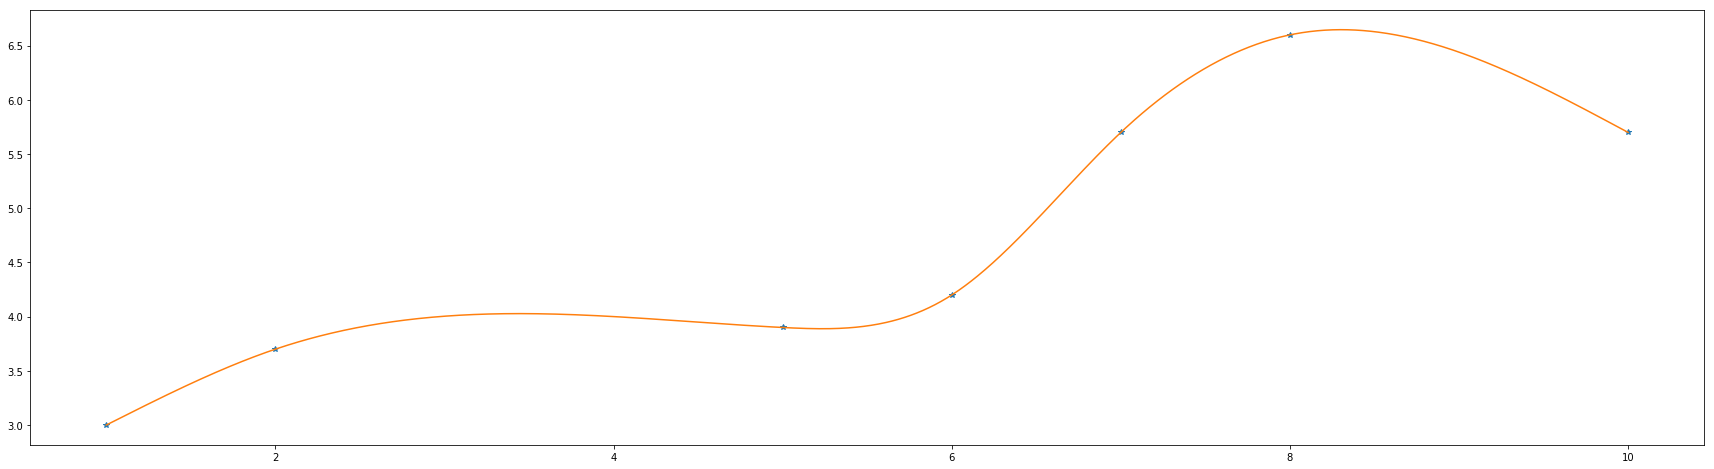

In [14]:

fig=plt.figure(figsize=(30,8))
ax=plt.axes()
ax.plot(x_list,y_list,'*')
ax.plot(x_array,y_array,'-',)
#ax.plot(x_array,y_real,'--')
plt.show()
